# Human Resources Analytics - Employee Churn

### Hiring and Retaining new employees are extremely convoluted tasks that require capital, time and skills. Most of the times when skilled employees leave, it costs far more to replace them than providing them with incentives to retain them. Therefore, our hypothetical company wants to apply data science methodologies to deal with the critical problem of Employee Churn based on factors such as job satisfaction, work life balance, performance rating, education and job involvment.

### 1) Importing dataset and required libraries.

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset from pandas.
employee_df = pd.read_csv('Human_Resources.csv')

In [3]:
# check the first 5 rows of the dataset using the head method.
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# check the last 5 rows of the dataset using the head method.
employee_df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
# calculates the statistics of the integer fields.
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# check the data types of all the features using the info() method
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### 2) Exploratory Data Analysis (EDA)

In [7]:
#Lets replace Attrition, Over18, Overtime to integers before proceesing
#with our exploratory data analysis.
employee_df["Attrition"] = employee_df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)
employee_df["Over18"] = employee_df["Over18"].apply(lambda x: 1 if x == "Y" else 0)
employee_df["OverTime"] = employee_df["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)

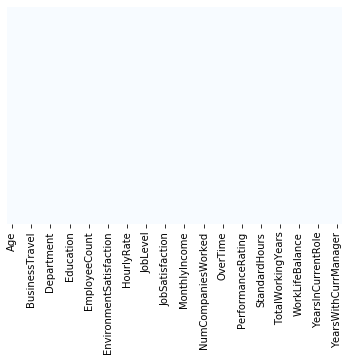

In [8]:
#check if data contains missing values
sns.heatmap(employee_df.isnull(),yticklabels=False,cbar = False,cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31a41462b0>,
      dtype=object)

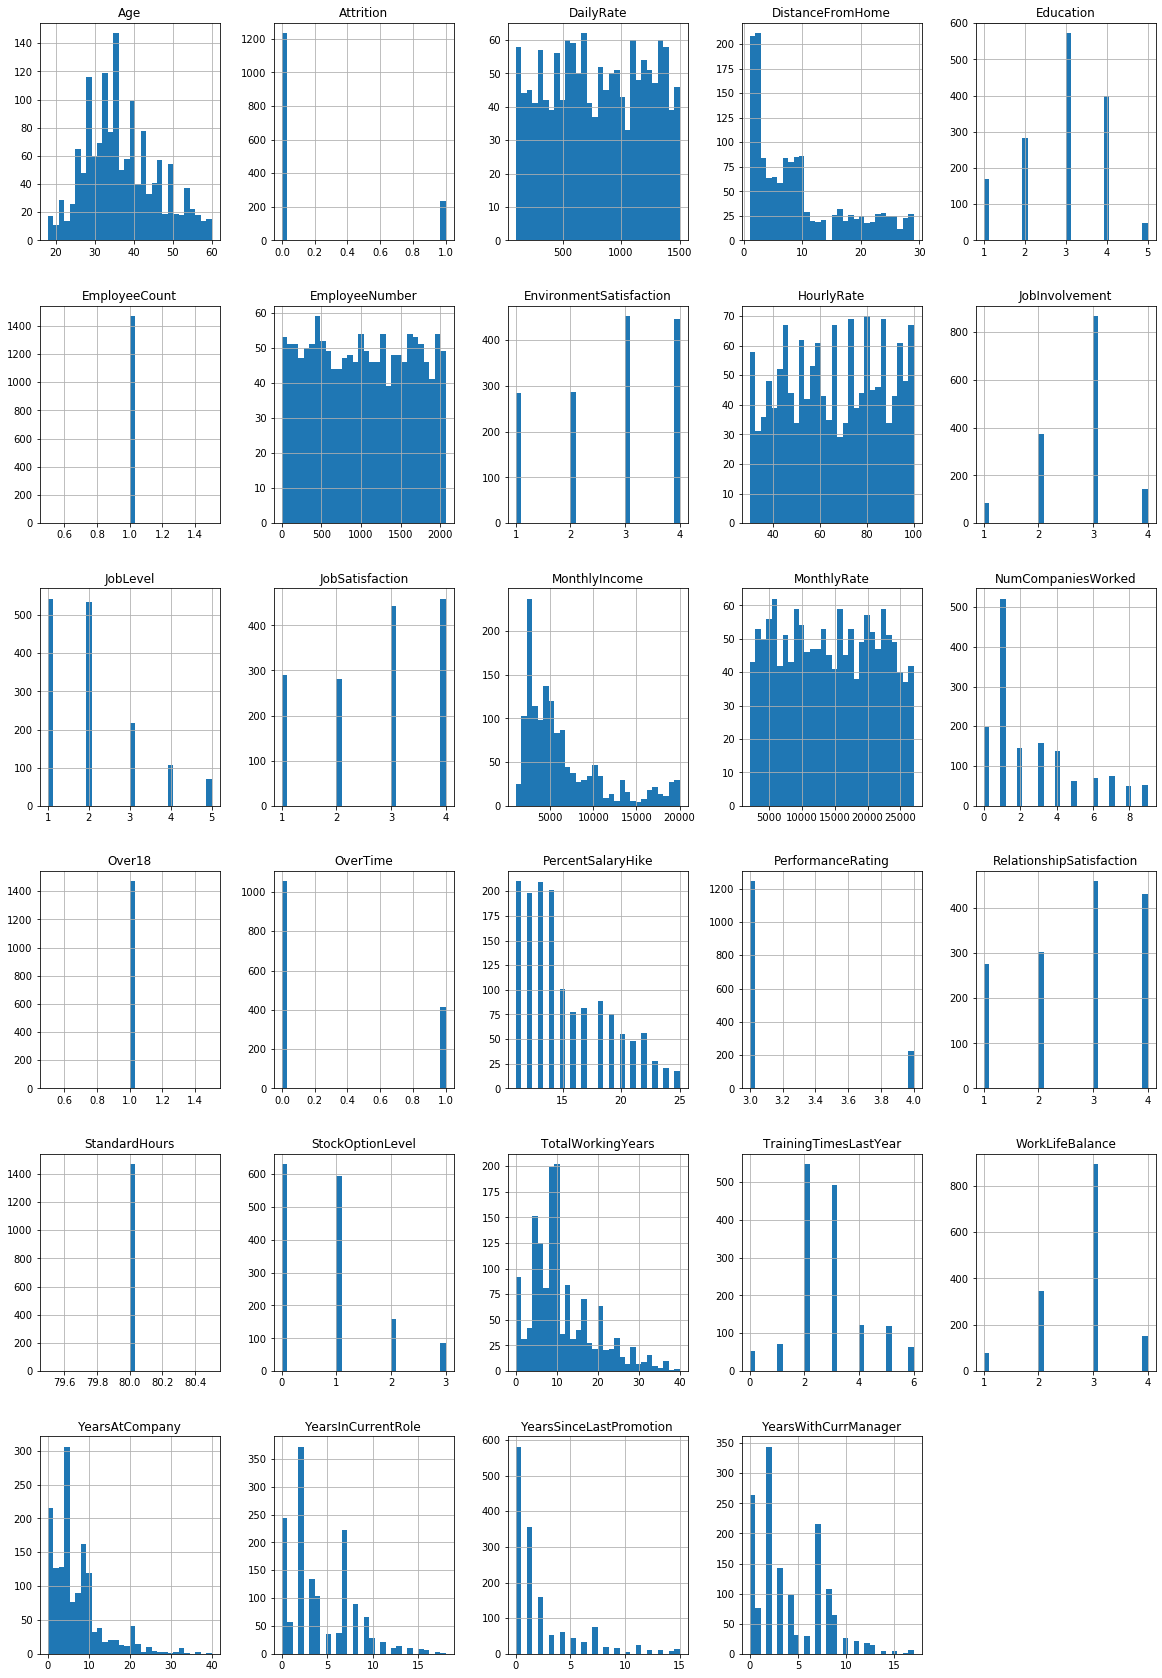

In [9]:
#plot histogram
employee_df.hist(bins = 30, figsize=(20,30))

In [10]:
# We will be dropping the EmployeeCount, EmployeeNumber, Over18,StandardHours
employee_df.drop(["EmployeeCount","Over18", "StandardHours", "EmployeeNumber"], axis=1, inplace = True)

In [11]:
#check the dataset
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [12]:
# Number of employees who left.
left_df = employee_df[employee_df["Attrition"]==1]

In [13]:
# Number of employees who stayed.
stayed_df = employee_df[employee_df["Attrition"]==0]

In [14]:
#Percentage of employees who left
print("Percentage of employees who left is {0}%".format((len(left_df)/len(employee_df))*100))

Percentage of employees who left is 16.122448979591837%


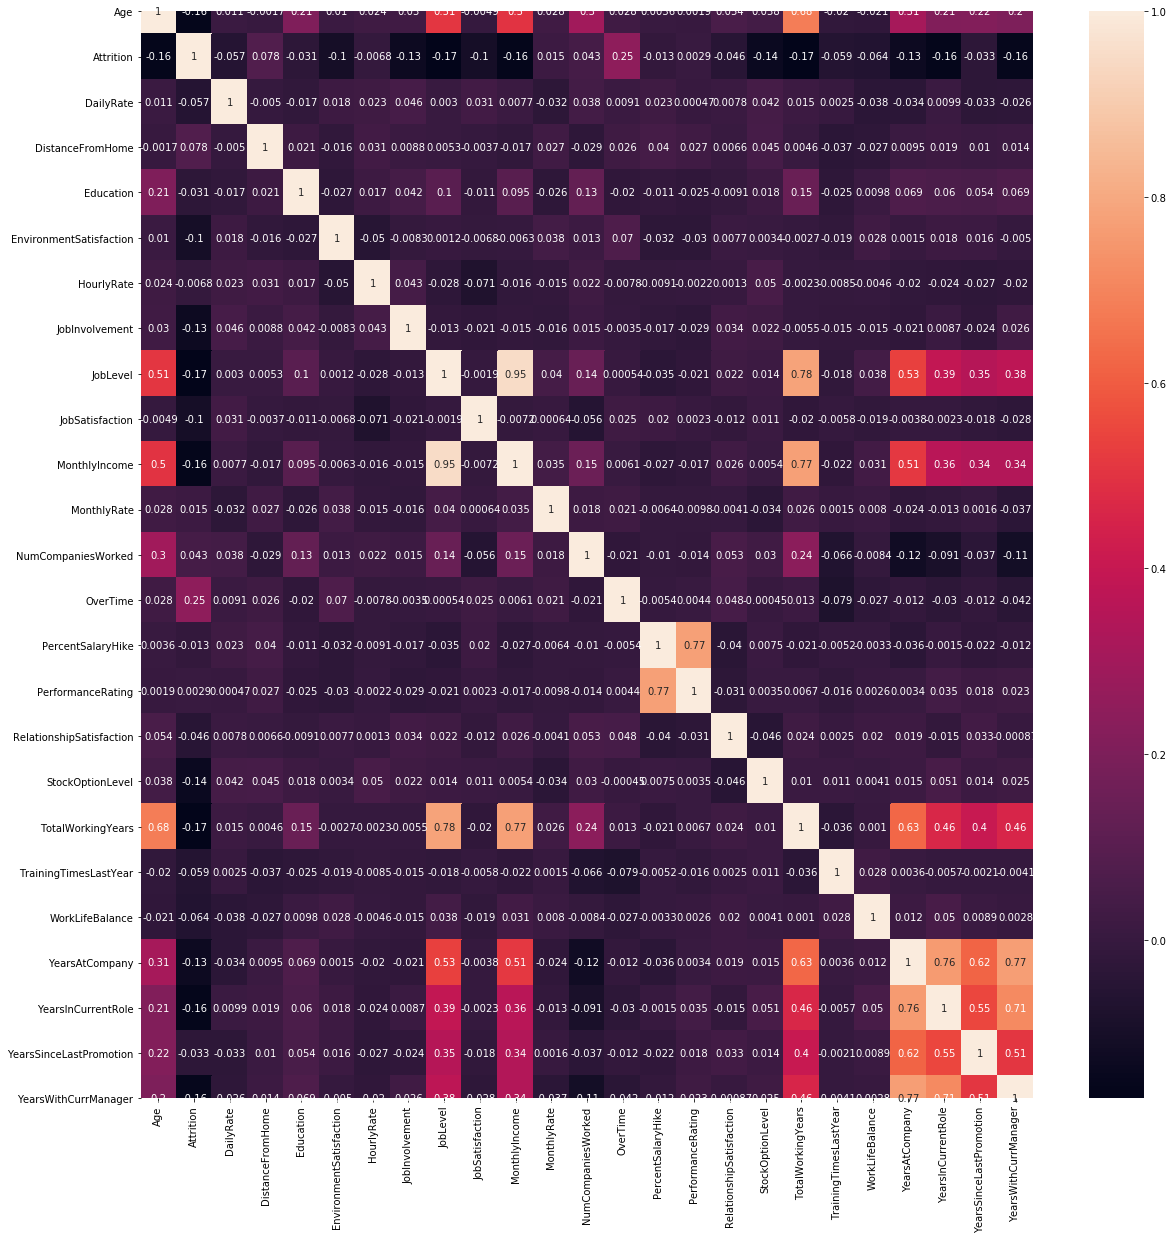

In [15]:
correlations = employee_df.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

#### There is strong corelation between Toatal working years and job level, and monthly income. As the experience level increases, so does the job level and the salary package. Age is also positively corelated with monthly income.

#### Lets explore the number of people who left and stayed in our company using the Seaborn Countplots.

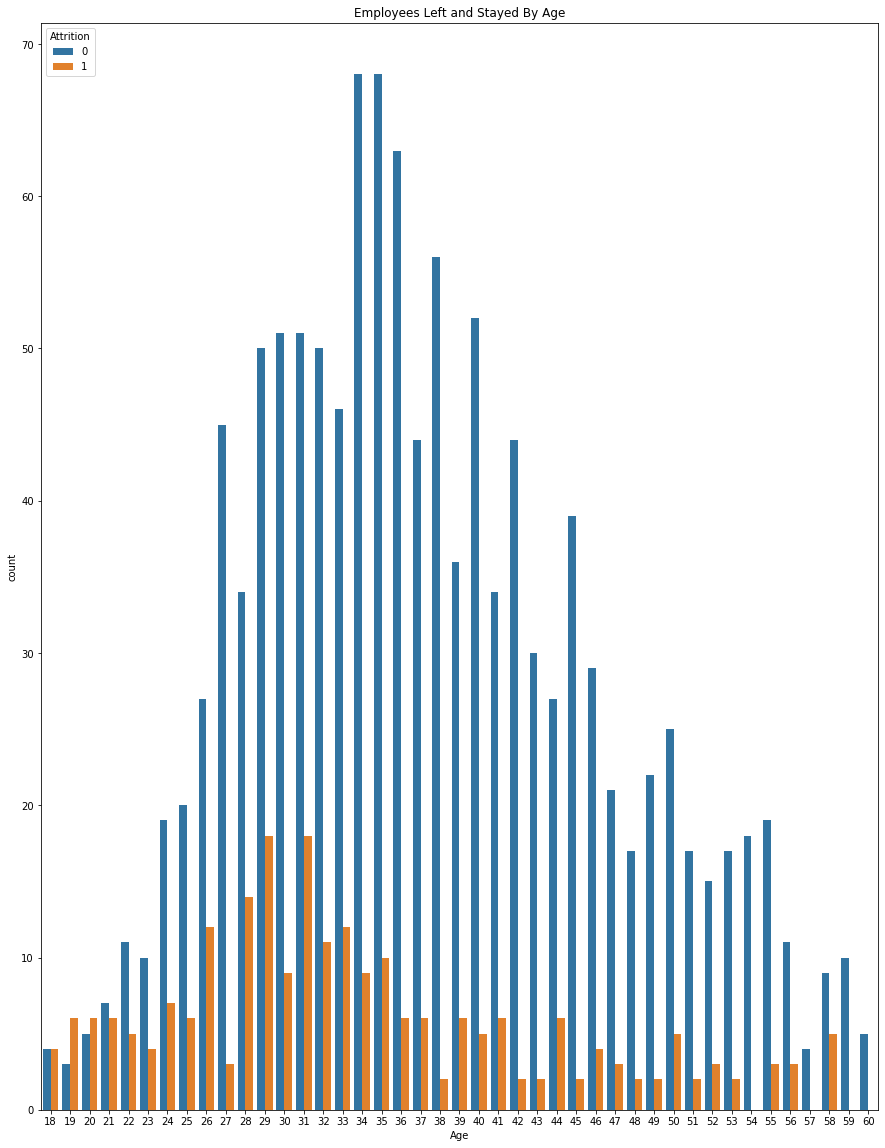

In [16]:
plt.figure(figsize=(15,20))
plt.xlabel("Count of Employee")
plt.ylabel("Age")
plt.title("Employees Left and Stayed By Age")
sns.countplot(x="Age",hue="Attrition",data=employee_df)

#### Now lets perform the analysis for MaritalStatus, Job involvement and Years At Company

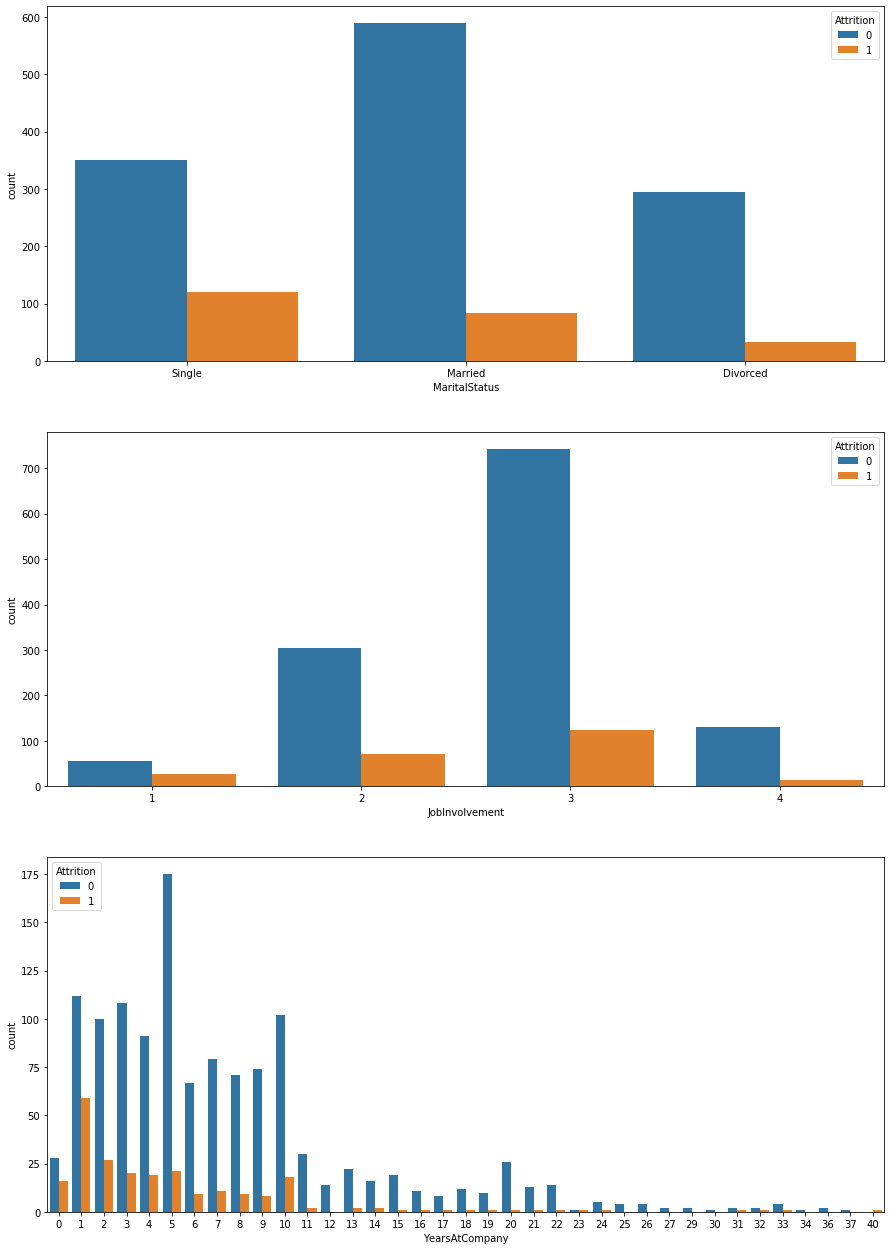

In [17]:
plt.figure(figsize = (15,30))
plt.subplot(411)
sns.countplot(x="MaritalStatus",hue="Attrition",data=employee_df)
plt.subplot(412)
sns.countplot(x="JobInvolvement",hue="Attrition",data=employee_df)
plt.subplot(413)
sns.countplot(x="YearsAtCompany",hue="Attrition",data=employee_df)



#### Now lets explore the Kernel Density plot which shows the probability distributions of a continuous variable

##### a) Distance from home

Text(0.5, 0, 'Distance From Home')

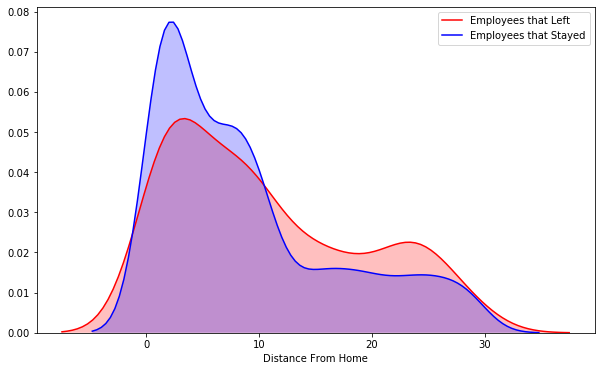

In [18]:
plt.figure(figsize=(10,6))
sns.kdeplot(left_df["DistanceFromHome"], shade = True, label = "Employees that Left", color='r')  
sns.kdeplot(stayed_df["DistanceFromHome"], shade = True, label = "Employees that Stayed", color='b')
plt.xlabel("Distance From Home")

##### b) Years with current manager

Text(0.5, 0, 'Years with Current Manager')

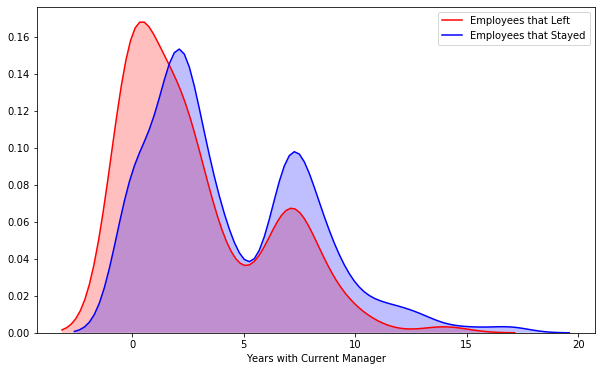

In [19]:
plt.figure(figsize=(10,6))
sns.kdeplot(left_df["YearsWithCurrManager"], shade = True, label = "Employees that Left", color='r')  
sns.kdeplot(stayed_df["YearsWithCurrManager"], shade = True, label = "Employees that Stayed", color='b')
plt.xlabel("Years with Current Manager")

##### c) Distance from home

Text(0.5, 0, 'Total Working Years')

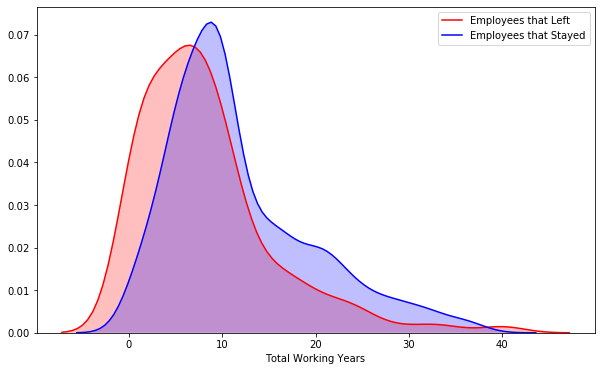

In [20]:
plt.figure(figsize=(10,6))
sns.kdeplot(left_df["TotalWorkingYears"], shade = True, label = "Employees that Left", color='r')  
sns.kdeplot(stayed_df["TotalWorkingYears"], shade = True, label = "Employees that Stayed", color='b')
plt.xlabel("Total Working Years")

#### Now lets explore the Box Plot which shows the distributions of monthly income versus Age and Job Role

##### c) Monthly income vs Gender

Text(0.5, 1.0, 'Income Across Genders')

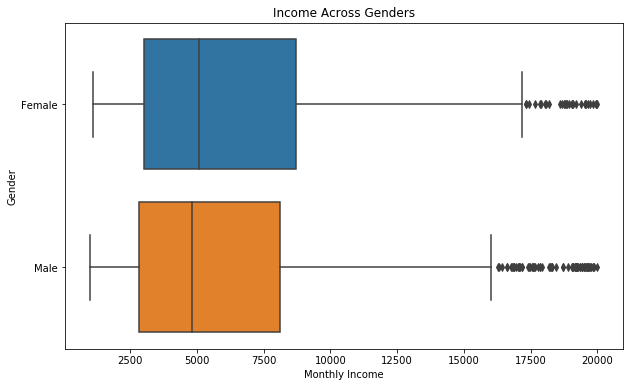

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x="MonthlyIncome",y="Gender",data=employee_df)
plt.xlabel("Monthly Income")
plt.ylabel("Gender")
plt.title("Income Across Genders")

##### c) Monthly income vs Job Role

Text(0.5, 1.0, 'Income Across Various Job Roles')

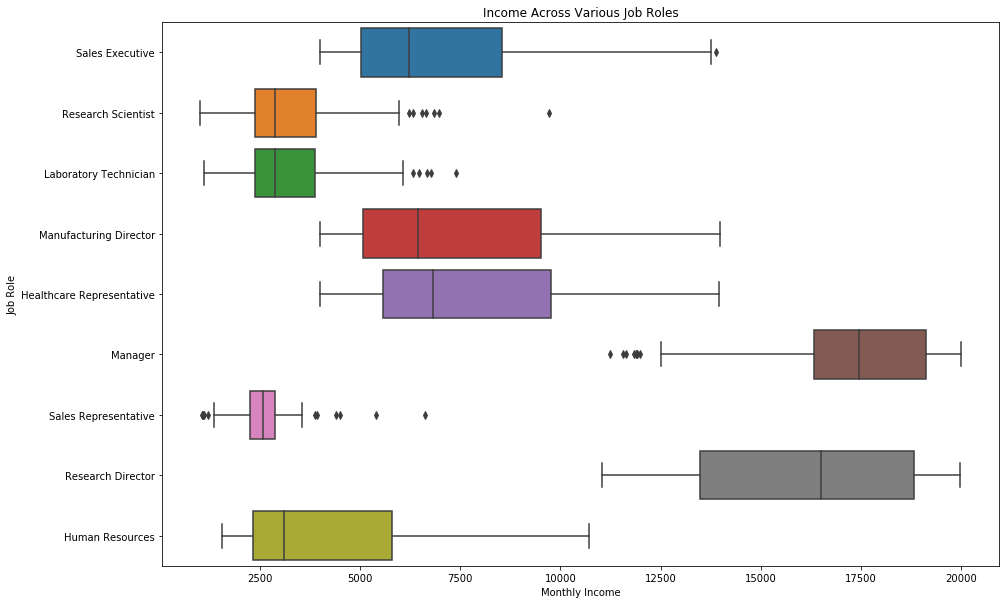

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(x="MonthlyIncome",y="JobRole",data=employee_df)
plt.xlabel("Monthly Income")
plt.ylabel("Job Role")
plt.title("Income Across Various Job Roles")

### 3) Data Cleaning, Data Preprocessing, Splitting Data into Training set and Testing Set

In [23]:
xcat = employee_df[["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus"]]

In [24]:
#encoding the categorical variables
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
xcat = onehotencoder.fit_transform(xcat).toarray()

In [25]:
xcat = pd.DataFrame(xcat)

In [26]:
x_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome','Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]

In [27]:
#concatenating categorical and numerical data
x_all = pd.concat([xcat,x_numerical], axis=1)

In [28]:
#Performing standardization to scale the various values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_all = scaler.fit_transform(x_all)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [29]:
#Independent variables
x_all.shape

(1470, 50)

In [30]:
#dependent variable
y_all = employee_df["Attrition"]

### 4) Training and Evaluating a Logistic Regression Classifier

In [31]:
#splitting the data into training set and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_all,y_all,test_size=0.2)

In [32]:
# Training the logistic regression model. Test the model with testing data set.
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
# Evaluating the model
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [34]:
# Accuracy score
print("The accuracy of the logistic regression model is {}%".format(accuracy_score(y_pred,y_test)))

The accuracy of the logistic regression model is 0.9081632653061225%


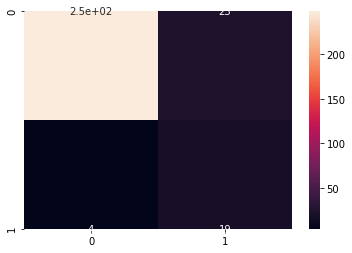

In [35]:
# confusion matrix
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)

In [36]:
# Classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       271
           1       0.45      0.83      0.58        23

   micro avg       0.91      0.91      0.91       294
   macro avg       0.72      0.87      0.77       294
weighted avg       0.94      0.91      0.92       294



### 5) Training and Evaluating a Random Forest Classifier.

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
randomForestClassifier =  RandomForestClassifier()
randomForestClassifier.fit(x_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
#get predicted values using test set
y_pred = randomForestClassifier.predict(x_test)

In [40]:
print("The accuracy of the logistic regression model is {}%".format(100*accuracy_score(y_pred,y_test)))

The accuracy of the logistic regression model is 87.07482993197279%


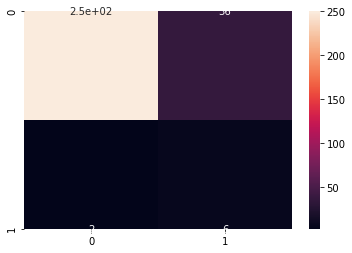

In [41]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)

In [42]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       286
           1       0.14      0.75      0.24         8

   micro avg       0.87      0.87      0.87       294
   macro avg       0.57      0.81      0.58       294
weighted avg       0.97      0.87      0.91       294



### 6) Training and Evaluating a Deep LEarning model

In [43]:
import tensorflow as tf

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

In [44]:
model = tf.keras.models.Sequential()

In [45]:
model.add(tf.keras.layers.Dense(units=500,activation="relu",input_shape=(50,)))
model.add(tf.keras.layers.Dense(units=500,activation="relu"))
model.add(tf.keras.layers.Dense(units=500,activation="relu"))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [46]:
#summarizes the created model.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               25500     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [47]:
#deciding the optimization function and cost function for the network
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [48]:
#training the model
epochs_hist = model.fit(x_train,y_train,epochs=100,batch_size=50)

Epoch 1/100
1176/1176 [==============================] - 5s 4ms/step - loss: 0.4236 - acc: 0.8359
Epoch 2/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3506 - acc: 0.8554
Epoch 3/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3184 - acc: 0.8810
Epoch 4/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3185 - acc: 0.8835
Epoch 5/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2675 - acc: 0.8937
Epoch 6/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2328 - acc: 0.9124
Epoch 7/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.2159 - acc: 0.9158
Epoch 8/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.1619 - acc: 0.9371
Epoch 9/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.1255 - acc: 0.9541
Epoch 10/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.0846 - acc: 0.9694
Epoch 11/100
1176/1

In [49]:
#predict from testing set
y_pred = model.predict(x_test)

Text(0, 0.5, 'Loss')

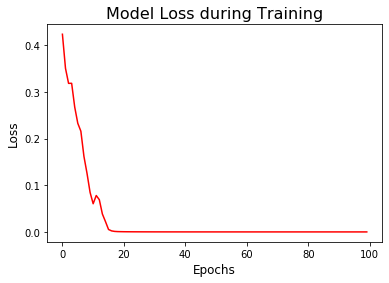

In [50]:
#plot the loss function across the training.
plt.plot(epochs_hist.history["loss"],color="r")
plt.title("Model Loss during Training",fontsize=16)
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Loss",fontsize=12)

Text(0, 0.5, 'Accuracy')

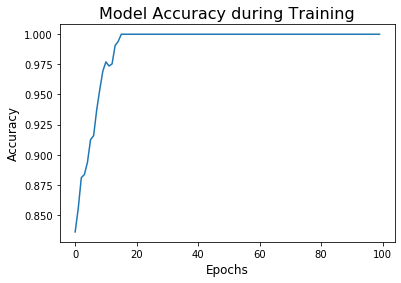

In [51]:
#plot the accuracy across the training.
plt.plot(epochs_hist.history["acc"])
plt.title("Model Accuracy during Training",fontsize=16)
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)